In [37]:
from lib.main_func_p1 import path, timer
import pandas as pd
from importlib import reload
from collections import OrderedDict
import lib.main_func_p4
from lib.main_func_p4 import modelXGBoost_fit_scores


#XGBoost library
import xgboost as xgb


In [38]:
# proteina (uniprot_ID)
uniprot_id = 'P00533'
excel_name = 'P00533_20220517173525_top_scores_XGBClassifier_f1_weighted_rf0'
path_file = path(uniprot_id)
# Parametros
seed = 142857
fp_name = 'morgan2_c'

In [39]:
# Load top_scores
top_scores = pd.read_excel(f'./top_scores/{excel_name}.xlsx')

# Best calibration scores
top_socres_len = 15
top_scores_top = top_scores.iloc[:top_socres_len]
top_scores_top_index_list = top_scores_top.index
top_scores.head()

,model,params_dict,AUC_train,AUC_valid,accuracy_train,accuracy_valid,recall_train,recall_valid,specificity_train,specificity_valid,precision_train,precision_valid,f1_score_train,f1_score_valid,conf_matrix_train,conf_matrix_valid,calibration_score
0,modelID_1064,"OrderedDict([('alpha', 0.7), ('gamma', 0.0), (...",0.996,0.973,0.981,0.932,0.980,0.917,0.981,0.939,0.958,0.867,0.981,0.932,"[[3485, 68], [31, 1545]]","[[589, 39], [23, 255]]",0.016959
1,modelID_413,"OrderedDict([('alpha', 0.3), ('gamma', 0.0), (...",0.996,0.974,0.981,0.933,0.975,0.917,0.984,0.940,0.965,0.870,0.981,0.933,"[[3497, 56], [40, 1536]]","[[590, 38], [23, 255]]",0.017717
2,modelID_1006,"OrderedDict([('alpha', 0.1), ('gamma', 0.2), (...",0.996,0.972,0.979,0.930,0.978,0.924,0.979,0.933,0.954,0.860,0.979,0.931,"[[3479, 74], [34, 1542]]","[[586, 42], [21, 257]]",0.017825
3,modelID_704,"OrderedDict([('alpha', 0.3), ('gamma', 0.1), (...",0.995,0.972,0.982,0.927,0.980,0.910,0.983,0.935,0.961,0.861,0.982,0.928,"[[3490, 63], [31, 1545]]","[[587, 41], [25, 253]]",0.017841
4,modelID_1003,"OrderedDict([('alpha', 0.2), ('gamma', 0.0), (...",0.996,0.974,0.980,0.933,0.975,0.910,0.982,0.943,0.962,0.875,0.980,0.933,"[[3492, 61], [40, 1536]]","[[592, 36], [25, 253]]",0.018178


In [40]:
reload(lib.main_func_p4)
from lib.main_func_p4 import modelXGBoost_fit_scores

resample_factor = int(str.split(excel_name,'_')[-1][2:])

# Load train and validation datasets
df_train = pd.read_pickle(f'{path_file}_dataset_train')
df_valid = pd.read_pickle(f'{path_file}_dataset_valid')

new_row_list = list()
results_ROF_list_train = list()
results_ROF_list_valid = list()
df_list = list()
plots_name_list = list()

for i, params_dict in enumerate(top_scores.params_dict.iloc[0:top_socres_len]):
    eval_metric = ['error', 'auc']
    tick = timer()
    params_dict_Orderer = params_dict
    params_dict = dict(eval(params_dict))
    default_params_xgb = {'booster': 'gbtree', 'tree_method': 'gpu_hist',
                          'objective':'binary:logistic', 'grow_policy': 'depthwise',
                          'eval_metric': eval_metric, 'early_stopping_rounds':10}
    params_dict.update(default_params_xgb)


    xgb_clf = xgb.XGBClassifier(**params_dict)

    # Train model and evaluating scores (train / validation)
    xgb_clf, scores_train, scores_valid = modelXGBoost_fit_scores(xgb_clf, fp_name, df_train, df_valid,
                                                                  resample_factor=resample_factor,
                                                                  resample_mode='under_sampling')

    if i == 0:
        xgb_clf.save_model(f'./models/{uniprot_id}_model.ubj')
        print(f'Best model saved ({top_scores.model.iloc[i]})')

    # ROF results
    results_ROF_list_train.append(scores_train[7])
    results_ROF_list_valid.append(scores_valid[7])

    # save pred and pred_prob of train set
    df = df_train[['activity', 'prediction', 'prediction_prob']].copy()
    df_list.append(df)

    plots_name_list.append(top_scores.model.iloc[i])
    print(f'{i+1}/{top_socres_len}. {top_scores.model.iloc[i]}. AUC_socre=(train={scores_train[0]},'
          f' valid={scores_valid[0]}). Time elapsed: {timer(tick)}')

Best model saved (modelID_1064)
1/15. modelID_1064. AUC_socre=(train=0.996, valid=0.969). Time elapsed: 4.7 seconds.
2/15. modelID_413. AUC_socre=(train=0.995, valid=0.971). Time elapsed: 4.2 seconds.
3/15. modelID_1006. AUC_socre=(train=0.997, valid=0.97). Time elapsed: 5.0 seconds.
4/15. modelID_704. AUC_socre=(train=0.996, valid=0.966). Time elapsed: 5.0 seconds.
5/15. modelID_1003. AUC_socre=(train=0.993, valid=0.968). Time elapsed: 4.5 seconds.
6/15. modelID_836. AUC_socre=(train=0.995, valid=0.967). Time elapsed: 4.8 seconds.
7/15. modelID_646. AUC_socre=(train=0.993, valid=0.968). Time elapsed: 3.8 seconds.
8/15. modelID_1097. AUC_socre=(train=0.996, valid=0.968). Time elapsed: 4.3 seconds.
9/15. modelID_894. AUC_socre=(train=0.996, valid=0.968). Time elapsed: 4.6 seconds.
10/15. modelID_460. AUC_socre=(train=0.997, valid=0.965). Time elapsed: 4.8 seconds.
11/15. modelID_1065. AUC_socre=(train=0.995, valid=0.969). Time elapsed: 4.1 seconds.
12/15. modelID_1091. AUC_socre=(train=

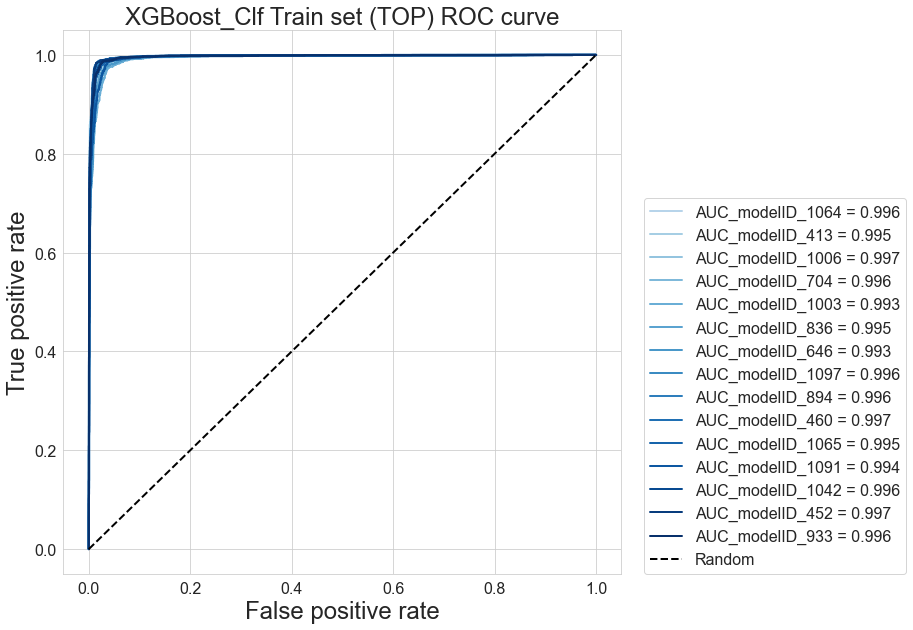

In [41]:
# ROC curve - best scores
reload(lib.main_func_p4)
from lib.main_func_p4 import plot_ROC_curve
results_ROF_train_list_top = list()
results_ROF_valid_list_top = list()
ROC_plots_name_top_name = list()
for i in top_scores_top_index_list:
    results_ROF_train_list_top.append(results_ROF_list_train[i])
    results_ROF_valid_list_top.append(results_ROF_list_valid[i])
    ROC_plots_name_top_name.append(plots_name_list[i])

model_name = f'XGBoost_Clf Train set (TOP)'
plot_ROC_curve(results_ROF_train_list_top, ROC_plots_name_top_name, model_name,
               path_file=path_file, name_mod="train_Top_score", save_fig=True)

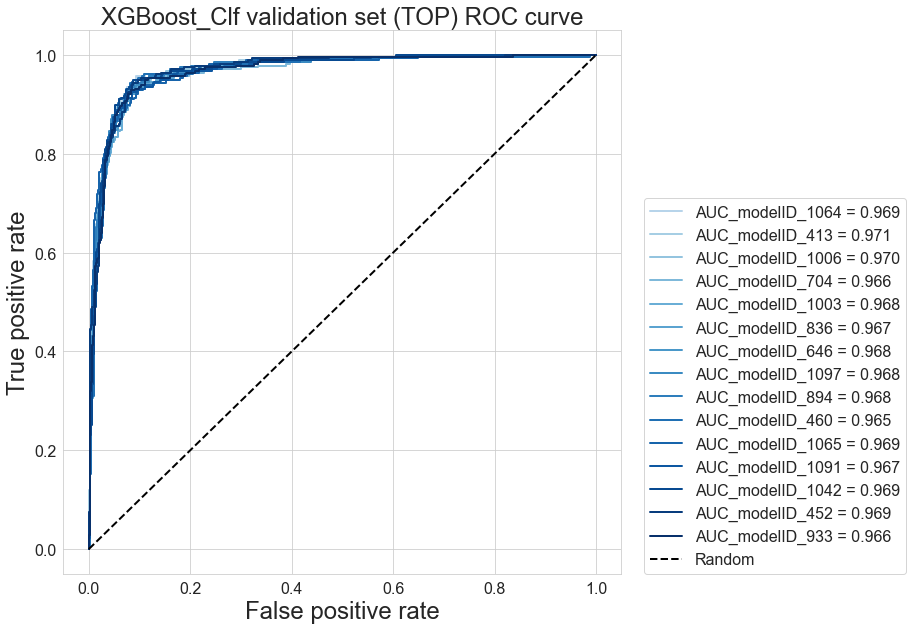

In [42]:
model_name = f'XGBoost_Clf validation set (TOP)'
plot_ROC_curve(results_ROF_valid_list_top, ROC_plots_name_top_name, model_name,
               path_file=path_file, name_mod="validation_Top_score", save_fig=True)

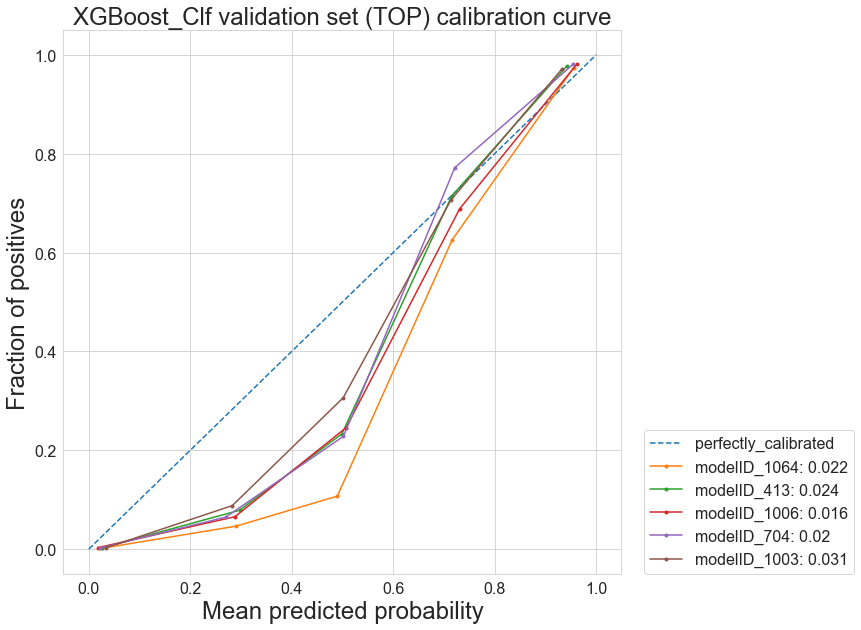

In [43]:
# Calibration curve - best scores (10)
reload(lib.main_func_p4)
from lib.main_func_p4 import plot_calibration_curve
df_list_top = list()
df_list_top_name = list()

# Only graph top 5
for i in top_scores_top_index_list:
    df_list_top.append(df_list[i])
    df_list_top_name.append((plots_name_list[i]))
plot_calibration_curve(df_list_top[:5], df_list_top_name[:5], model_name,
                       path_file=path_file, name_mod="validation_Top_score", save_fig=True)